# Table of Contents

[1. Import librearies and dataframe](#1-import-libraries-and-dataframe) \
[2. Data Preprocessing](#2-data-preprocessing) \
[3. Deploy Linear Regression (part 01)](#3-deploy-linear-regression-part-1) \
[4. Data Normalization (part 02)](#4-data-normalization-part-2) \
[5. Feature Engineering (part 03)](#5-feature-engineering-part-03) \
[6. Using `sklearn` (part 04)](#6-using-sklearn-part-4)

## 1. Import libraries and dataframe

Import necessary libraries

In [169]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Import dataframe

In [170]:
df = pd.read_csv('../data/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## 2. Data Preprocessing

In [171]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [172]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [173]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [174]:
df.shape

(517, 13)

In [175]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [176]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_map)
df.dtypes

X          int64
Y          int64
month      int64
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [177]:
day_map = {
    'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5,
    'fri': 6, 'sat': 7, 'sun': 1
}

# Áp dụng ánh xạ để chuyển đổi cột 'day'
df['day'] = df['day'].map(day_map)

In [178]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## 3. Deploy Linear Regression (part 1)

### 3.1. Split the dataset into training and testing subdatasets

In [179]:
X = df.drop(columns=['area'])
y = df['area']

X = df.drop(columns=['area']).values
y = df['area'].values


np.random.seed(42)  
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]


split_ratio = 0.8
split_index = int(X_shuffled.shape[0] * split_ratio)

X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

### 3.2. Initiate `LinearRegression` class 

In [180]:
class LinearRegression():
    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X] 
        self.coef_ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X] 
        return X.dot(np.r_[self.intercept_, self.coef_])

    def rsse(self, X, y):
        y_pred = self.predict(X)
        errors = (y - y_pred) ** 2
        return np.sqrt(np.sum(errors)) 

In [181]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

n = len(y_test)
rmse = np.sqrt(np.sum((y_test - y_pred) ** 2) / n) 
residuals = y_test - y_pred  

C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_3412\552498832.py:1: RuntimeWarning: divide by zero encountered in divide
  relative_error = np.abs(y_test - y_pred) / y_test * 100


RMSE: 24.5483


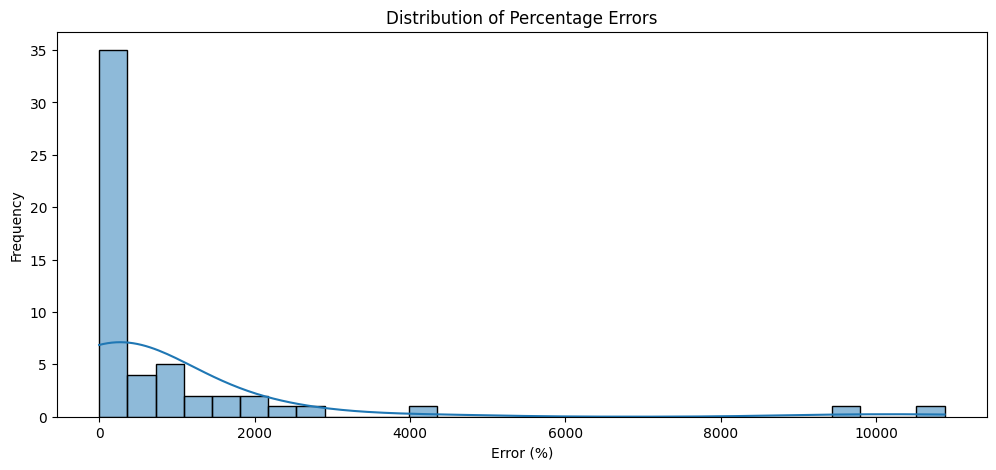

In [182]:
relative_error = np.abs(y_test - y_pred) / y_test * 100 

plt.figure(figsize=(12, 5))
plt.title("Distribution of Percentage Errors")
sns.histplot(relative_error, bins=30, kde=True)
plt.xlabel("Error (%)") 
plt.ylabel("Frequency")
print(f"RMSE: {rmse:.4f}")

## 4. Data normalization (part 2)

Normalize the data to a distribution with an expected value of 0 and a variance of 1.

In Statistics, to normalize the distribution with an expected value of 0 and a variance of 1, that means the distribution will be standardised, following this formula:
$$
    Z = \frac{X - \mu}{\sigma}
$$
where:
- $X$ is the data point
- $\mu$ is the mean of the data
- $\sigma$ is the standard deviation of the data
- $Z$ is the standardized data point

In [183]:
df_standarized = df.copy()  # Create a copy to avoid modifying the original dataset

for i in df.columns:
    if df[i].dtype in [np.float64, np.int64]:  # Standardize only numerical columns
        df_standarized[i] = (df[i] - df[i].mean()) / df[i].std()



In [184]:
df_standarized.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,1.632049e-16,2.267690e-16,-1.168204e-16,-5.325635e-17,-1.750588e-15,0.000000,4.123072e-17,2.061536e-17,2.542561e-16,1.924100e-16,-4.449482e-16,6.871787e-18,5.153840e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.585825e+00,-1.869913e+00,-2.845277e+00,-1.386710e+00,-1.303319e+01,-1.713948,-2.177000e+00,-1.978662e+00,-2.874160e+00,-1.794899e+00,-2.019142e+00,-7.319742e-02,-2.018243e-01
25%,-7.214373e-01,-2.437649e-01,-2.090616e-01,-9.202628e-01,-8.055651e-02,-0.660026,-4.443977e-01,-5.530598e-01,-5.836726e-01,-6.917863e-01,-7.354113e-01,-7.319742e-02,-2.018243e-01
50%,-2.892437e-01,-2.437649e-01,2.303076e-01,1.263106e-02,1.730616e-01,-0.040164,4.686651e-01,-1.363453e-01,7.075224e-02,-1.402302e-01,-9.824197e-03,-7.319742e-02,-1.936554e-01
75%,1.007337e+00,5.693090e-01,6.696769e-01,9.455249e-01,4.085641e-01,0.492262,6.690148e-01,3.900308e-01,6.735120e-01,5.338940e-01,4.925053e-01,-7.319742e-02,-9.861301e-02
max,1.871724e+00,3.821605e+00,1.987784e+00,1.411972e+00,1.006378e+00,2.817136,1.260389e+00,1.032538e+01,2.481791e+00,3.414243e+00,3.004153e+00,2.155141e+01,1.693471e+01


Now, we split the data into 2 seperate sub-datasets.

In [185]:
X2 =df_standarized.drop(columns=['area']).values
y2 = df_standarized['area'].values

np.random.seed(42)
indices2 = np.arange(len(y2))
np.random.shuffle(indices2)

X2, y2 = X2[indices2], y2[indices2]
split_ratio2 = 0.8
split_index2 = int(len(y2) * split_ratio2)

X_train2, X_test2 = X2[:split_index2], X2[split_index2:]
y_train2, y_test2 = y2[:split_index2], y2[split_index2:]

Now, we use this corpus to retrain the Linear Regression model.

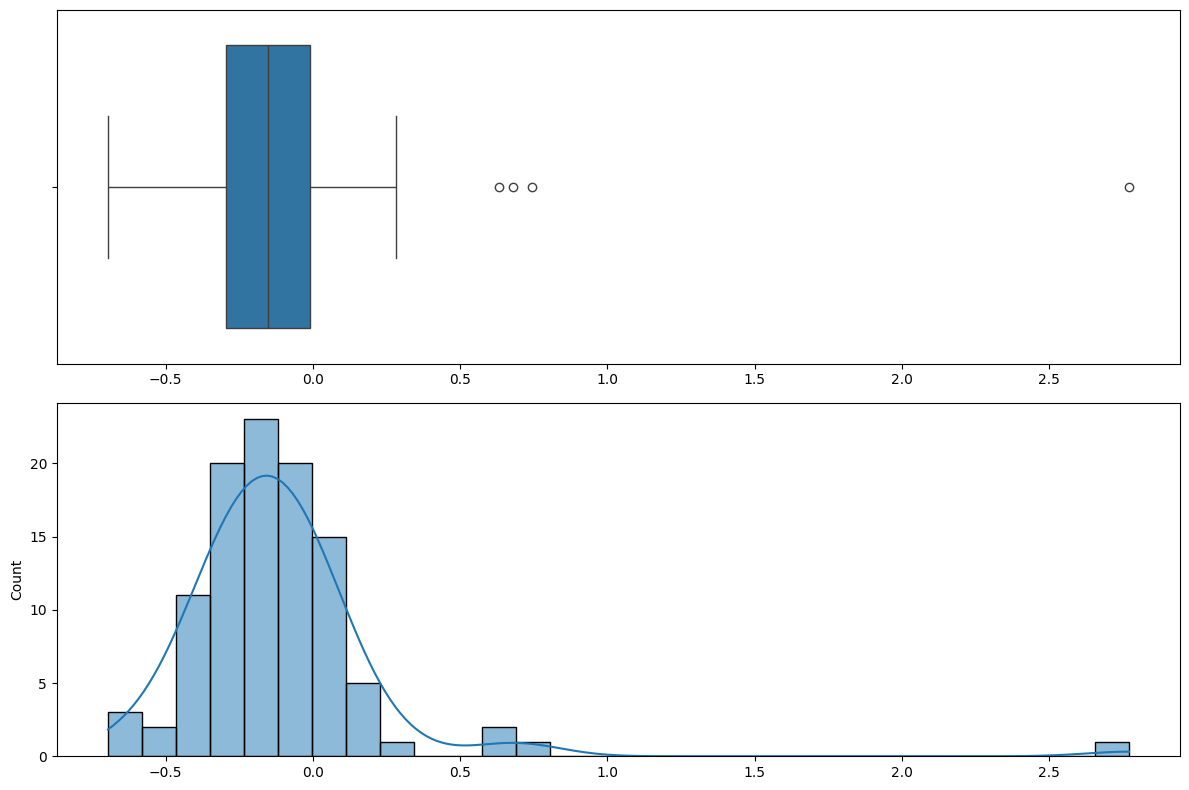

In [186]:
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred2 = regressor2.predict(X_test2) 

n2 = len(y_test2)
rmse2 = np.sqrt(np.sum((y_test2 - y_pred2) ** 2) / n2)  
residuals2 = y_test2 - y_pred2  

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x=residuals2) 

plt.subplot(2, 1, 2)
sns.histplot(residuals2, bins=30, kde=True)

plt.tight_layout()

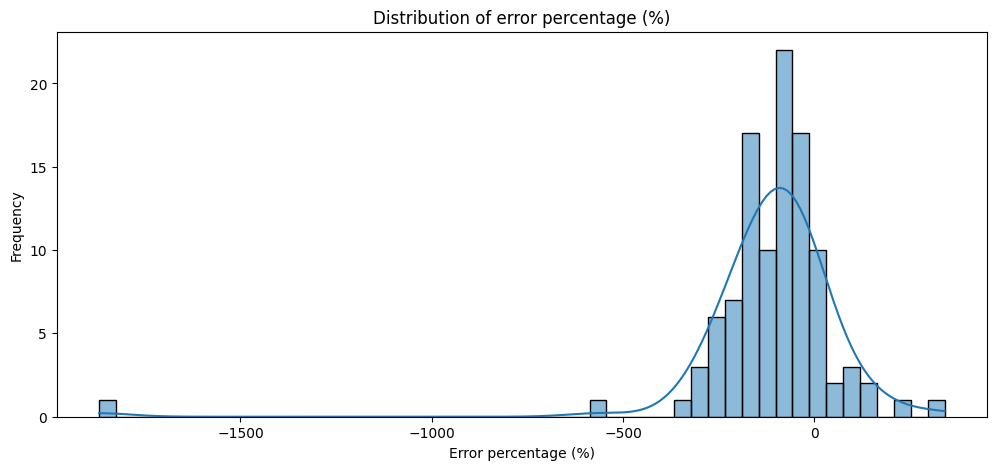

In [187]:
relative_error2 = np.abs(y_test2 - y_pred2) / y_test2 * 100  

plt.figure(figsize=(12, 5))
plt.title("Distribution of error percentage (%)")  # Update title to indicate percentage
sns.histplot(relative_error2,
             bins=50,
             kde=True,
             )
plt.xlabel("Error percentage (%)")  # Update x-axis label to indicate percentage
plt.ylabel("Frequency")
plt.show()

<Axes: title={'center': 'Distribution of error percentage (%) (standardized dataset)'}, ylabel='Count'>

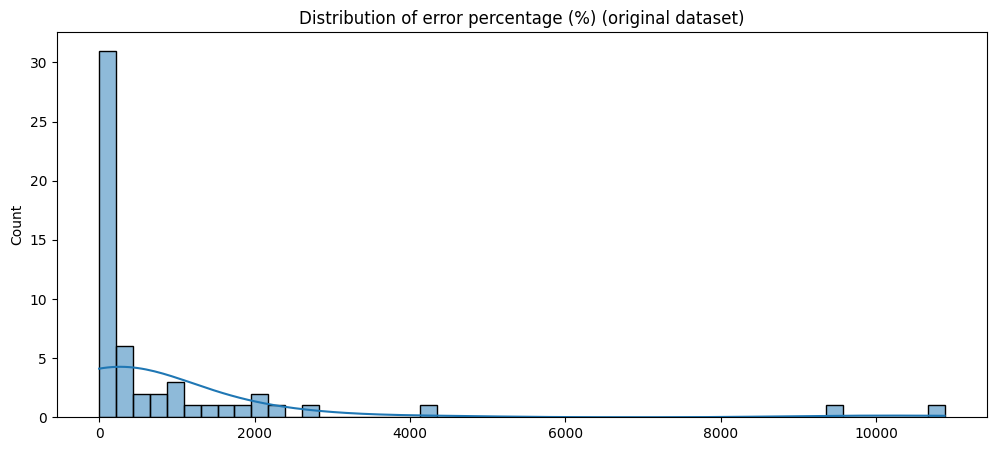

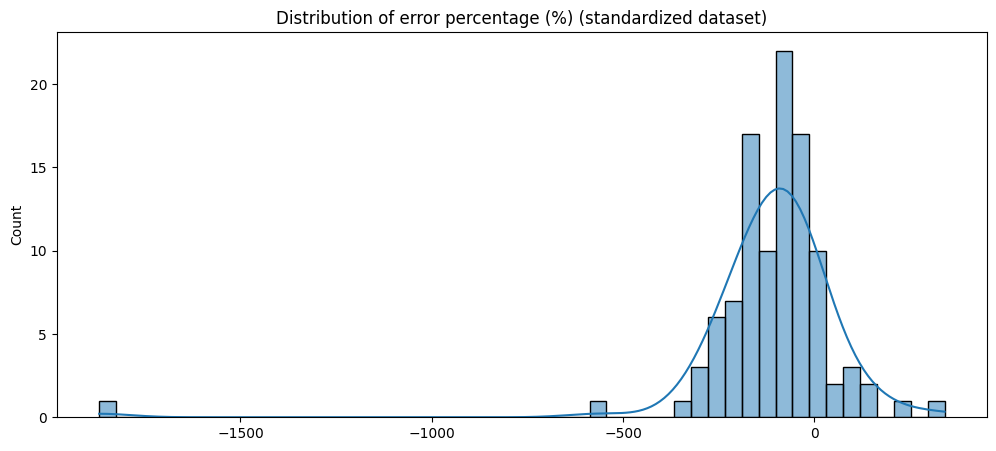

In [188]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of error percentage (%) (original dataset)")  
sns.histplot(relative_error,
             bins=50,
             kde=True,
             )
plt.figure(figsize=(12, 5))
plt.title("Distribution of error percentage (%) (standardized dataset)")  
sns.histplot(relative_error2,
             bins=50,
             kde=True,
             )

## 5. Feature Engineering (part 03)

Now, we will calculate the coverage of each pair of features

In [189]:
corr_matrix = df.corr()
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Text(0.5, 1.0, 'Correlation Heatmap')

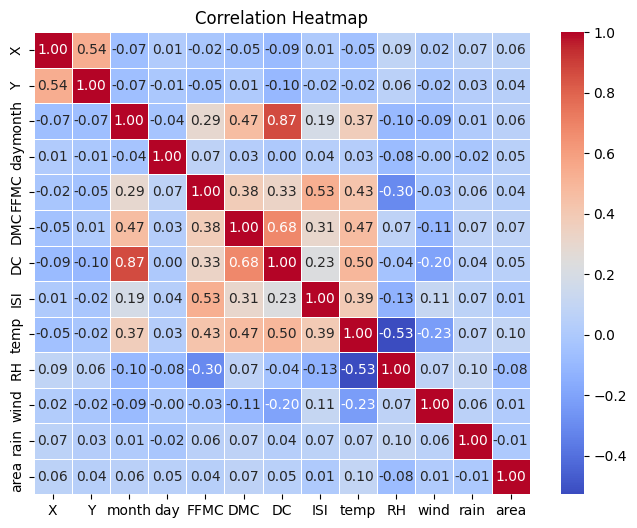

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

Commonly, we might eliminate either of the two features which have the coverage over $0.8$ or under $-0.8$. Hence, within the given dataset, either of `DC` or `month` will be ignored.

In [191]:
df3 = df.copy()
df3.drop(columns='month', inplace=True)
df3.head(10)

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [192]:
X3 = df3.drop(columns=['area']).values
y3 = df3['area'].values

np.random.seed(42)
indices3 = np.arange(len(y3))
np.random.shuffle(indices3)

X3, y3 = X3[indices3], y3[indices3]

split_ratio3 = 0.8
split_index3 = int(len(y3) * split_ratio3)

X_train3, X_test3 = X3[:split_index3], X3[split_index3:]
y_train3, y_test3 = y3[:split_index3], y3[split_index3:]

In [193]:
regressor3 = LinearRegression()
regressor3.fit(X_train3, y_train3)
y_pred3 = regressor3.predict(X_test3)

n3 = len(y_test3)
rmse3 = np.sqrt(np.sum((y_test3 - y_pred3) ** 2) / n3)
residuals3 = y_test3 - y_pred3

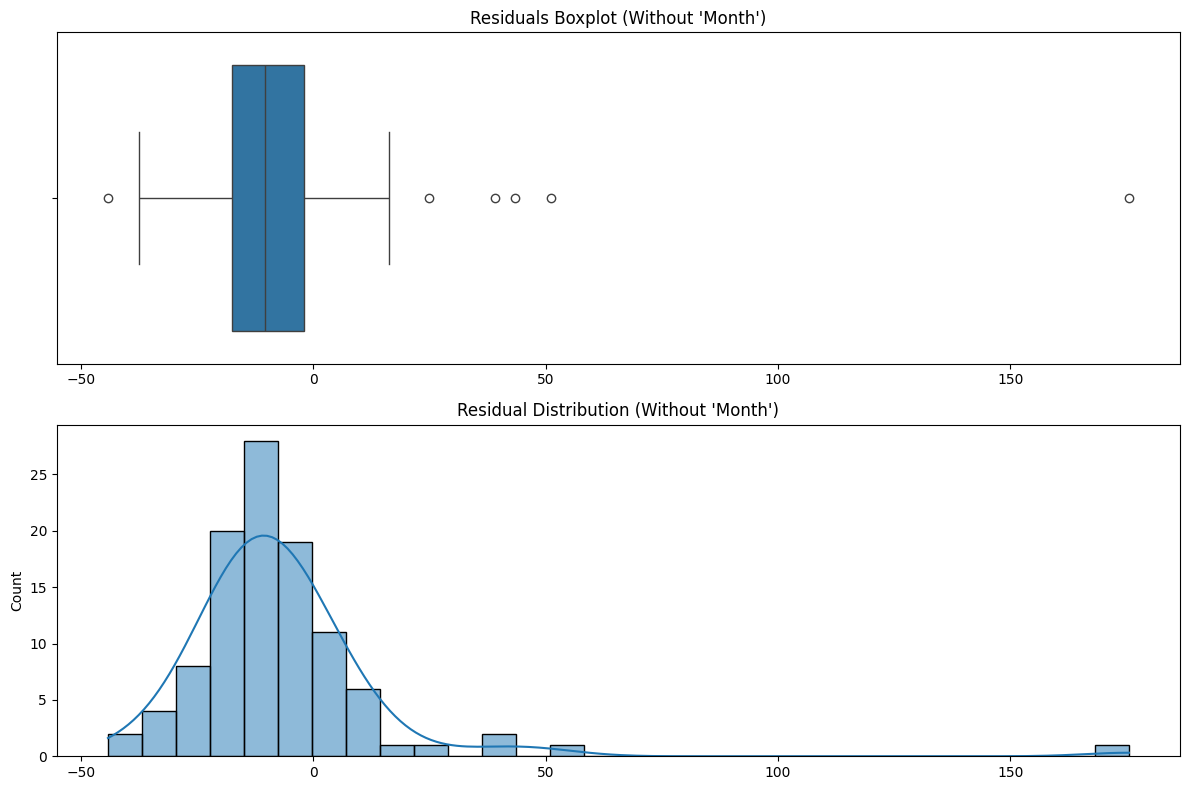

RMSE after dropping 'month': 24.4029


In [194]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x=residuals3)
plt.title("Residuals Boxplot (Without 'Month')")

plt.subplot(2, 1, 2)
sns.histplot(residuals3, bins=30, kde=True)
plt.title("Residual Distribution (Without 'Month')")

plt.tight_layout()
plt.show()

print(f"RMSE after dropping 'month': {rmse3:.4f}")

## 6. Using `sklearn` (part 4)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [196]:
X = df.drop(columns=['area']).values 
y = df['area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

residuals = y_test - y_pred

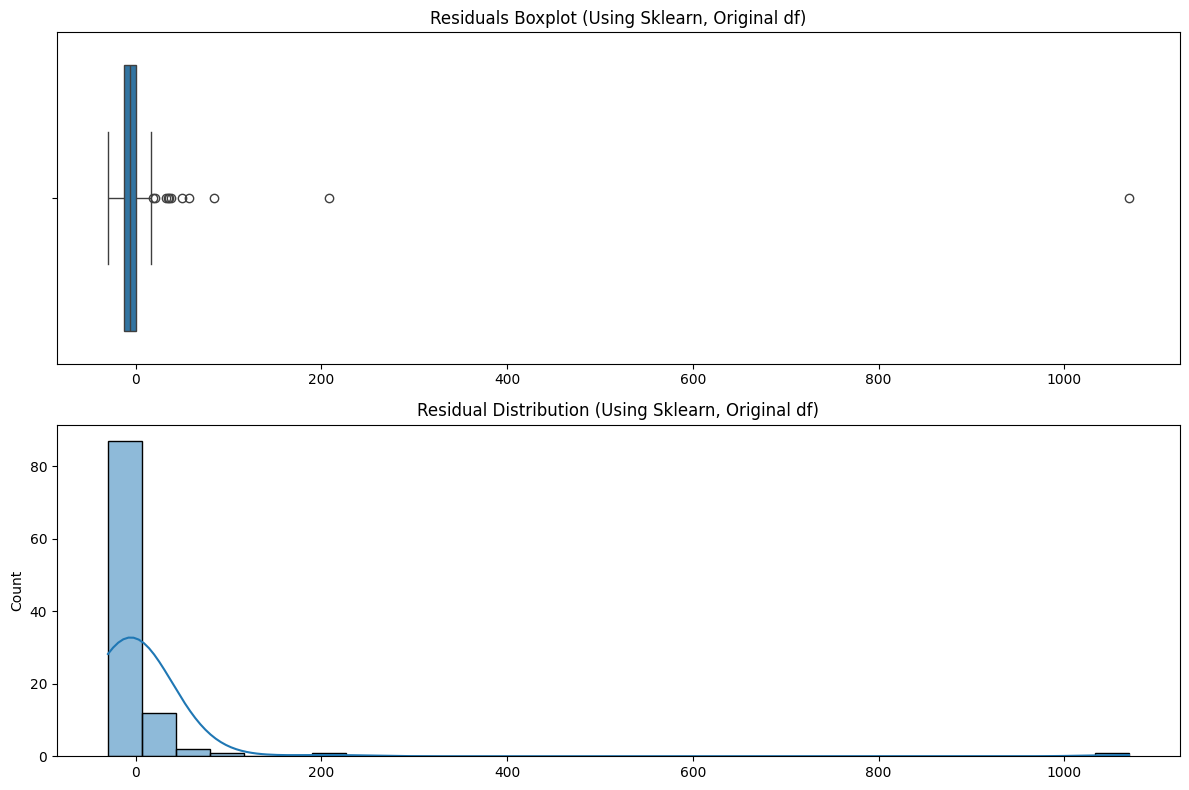

RMSE using Sklearn with original df: 108.2897


In [197]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x=residuals)
plt.title("Residuals Boxplot (Using Sklearn, Original df)")

plt.subplot(2, 1, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution (Using Sklearn, Original df)")

plt.tight_layout()
plt.show()

print(f"RMSE using Sklearn with original df: {rmse:.4f}")